# Lawschool Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20798 entries, 0 to 20797
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   decile1b  20798 non-null  object 
 1   decile3   20798 non-null  object 
 2   decile1   20798 non-null  object 
 3   cluster   20798 non-null  float64
 4   lsat      20798 non-null  float64
 5   ugpa      20798 non-null  float64
 6   zfygpa    20798 non-null  float64
 7   DOB_yr    20798 non-null  float64
 8   zgpa      20798 non-null  float64
 9   fulltime  20798 non-null  float64
 10  fam_inc   20798 non-null  float64
 11  age       20798 non-null  float64
 12  gender    20798 non-null  object 
 13  parttime  20798 non-null  float64
 14  race1     20798 non-null  object 
 15  pass_bar  20798 non-null  float64
 16  tier      20798 non-null  float64
dtypes: float64(12), object(5)
memory usage: 2.7+ MB
target count
1.0    19758
0.0     1040
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

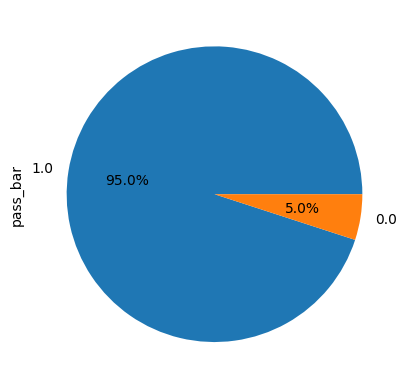

In [2]:
df = pd.read_csv("../Cleaned/Lawschool/lsac-compressed.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['pass_bar'].value_counts())
df['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## gender

b'male'      11675
b'female'     9123
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

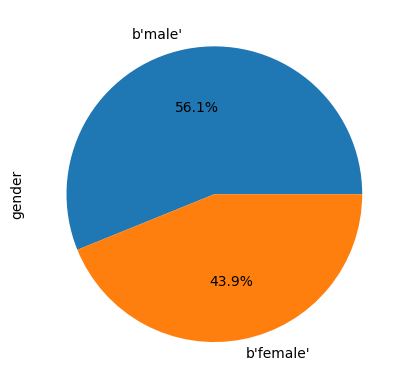

In [3]:
print(df['gender'].value_counts())
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = b'male'

1.0    11150
0.0      525
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

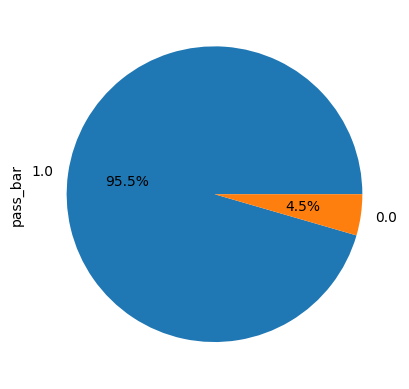

In [5]:
print(df.loc[df['gender']=="b'male'"]['pass_bar'].value_counts())
df.loc[df['gender']=="b'male'"]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = b'female'

1.0    8608
0.0     515
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

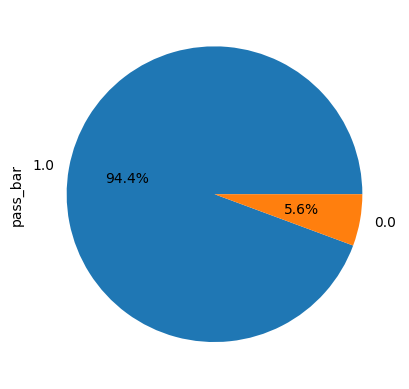

In [6]:
print(df.loc[df['gender']=="b'female'"]['pass_bar'].value_counts())
df.loc[df['gender']=="b'female'"]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1.0

let y- = 0.0

let s0 = b'male'

let s1 = b'female

In [7]:
# p(y+|s0) -> p(1.0|b'male')
p1 = len(df.loc[(df['gender']=="b'male'") & (df['pass_bar']>0.5)]) / len(df.loc[df['gender']=="b'male'"])
#print(p1)
# p(y-|s1) -> p(0.0|b'female')
p2 = len(df.loc[(df['gender']=="b'female'") & (df['pass_bar']<0.5)]) / len(df.loc[df['gender']=="b'female'"])
#print(p2)
# p(y+|s1) -> p(1.0|b'female')
p3 = len(df.loc[(df['gender']=="b'female'") & (df['pass_bar']>0.5)]) / len(df.loc[df['gender']=="b'female'"])
#print(p3)
# p(y-|s0) -> p(0.0|b'male')
p4 = len(df.loc[(df['gender']=="b'male'") & (df['pass_bar']<0.5)]) / len(df.loc[df['gender']=="b'male'"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.271


In [8]:
#OR for s0 = Female
oddsratio = (p3 * p4) / (p1 * p2)
print("OR: {:.3f}".format(oddsratio))

OR: 0.787


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1.0

let y- = 0.0

let s0 = b'male'

let s1 = b'female'

In [9]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.012


### Proxies

Most of the proxies found for sex include (a combination of):
 - 

Best model (min depth) found with a node at depth 2 with 6 samples.

	** decile1_b'09' > 0.5 , decile3_b'03' > 0.5 ,  #impurity: 0.0, #samples: 6.

Best model (max sample) found with 37 sample in a node at depth 5.

    ** fam_inc > 4.5 , ugpa <= 2.75 , age <= -44.0 , lsat > 41.25 , decile3_b'03' <= 0.5 ,  #impurity: 0.0, #samples: 37.
    
        

For proxy: decile1 == b'09' & decile3 == b'03'

b'male'    6
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

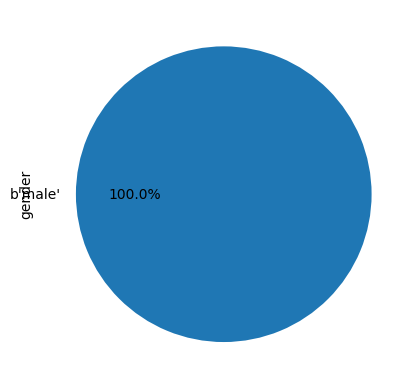

In [10]:
print(df.loc[(df['decile1']=="b'09'") & (df['decile3']=="b'03'")]['gender'].value_counts())
df.loc[(df['decile1']=="b'09'") & (df['decile3']=="b'03'")]['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

1.0    5
0.0    1
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

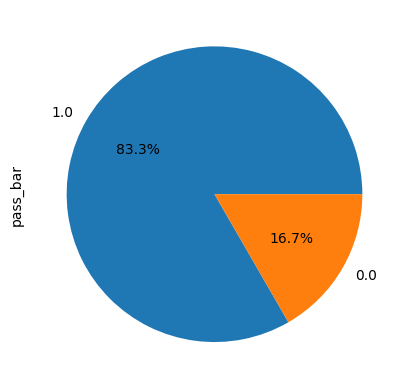

In [11]:
print(df.loc[(df['decile1']=="b'09'") & (df['decile3']=="b'03'")]['pass_bar'].value_counts())
df.loc[(df['decile1']=="b'09'") & (df['decile3']=="b'03'")]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1.0

let y- = 0.0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [12]:
# p(y+|s0) -> p(1.0|Proxy)
p1 = len(df.loc[(df['decile1']=="b'09'") & (df['decile3']=="b'03'") & (df['pass_bar']>0.5)]) / len(df.loc[(df['decile1']=="b'09'") & (df['decile3']=="b'03'")])
#print(p1)
# p(y-|s1) -> p(0.0|!Proxy)
p2 = len(df.loc[((df['decile1']!="b'09'") | (df['decile3']!="b'03'")) & (df['pass_bar']<0.5)]) / len(df.loc[((df['decile1']!="b'09'") | (df['decile3']!="b'03'"))])
#print(p2)
# p(y+|s1) -> p(1.0|!Proxy)
p3 = len(df.loc[((df['decile1']!="b'09'") | (df['decile3']!="b'03'")) & (df['pass_bar']>0.5)]) / len(df.loc[((df['decile1']!="b'09'") | (df['decile3']!="b'03'"))])
#print(p3)
# p(y-|s0) -> p(0.0|Proxy)
p4 = len(df.loc[(df['decile1']=="b'09'") & (df['decile3']=="b'03'") & (df['pass_bar']<0.5)]) / len(df.loc[(df['decile1']=="b'09'") & (df['decile3']=="b'03'")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.263


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1.0

let y- = 0.0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [13]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.877


For proxy: fam_inc > 4.5 & ugpa <= 2.75 & age <= -44.0 & lsat > 41.25 & decile3 != b'03'

b'male'    37
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

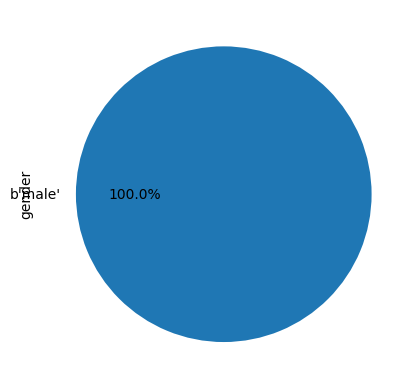

In [15]:
print(df.loc[(df['fam_inc']>4.5) & (df['ugpa']<=2.75) & (df['age']<=-44.0) & (df['lsat']>41.25) & (df['decile3']!="b'03'")]['gender'].value_counts())
df.loc[(df['fam_inc']>4.5) & (df['ugpa']<=2.75) & (df['age']<=-44.0) & (df['lsat']>41.25) & (df['decile3']!="b'03'")]['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

1.0    37
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

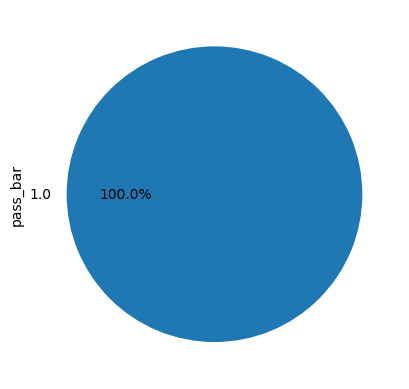

In [16]:
print(df.loc[(df['fam_inc']>4.5) & (df['ugpa']<=2.75) & (df['age']<=-44.0) & (df['lsat']>41.25) & (df['decile3']!="b'03'")]['pass_bar'].value_counts())
df.loc[(df['fam_inc']>4.5) & (df['ugpa']<=2.75) & (df['age']<=-44.0) & (df['lsat']>41.25) & (df['decile3']!="b'03'")]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1.0

let y- = 0.0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [17]:
# df.loc[(df['fam_inc']>4.5) & (df['ugpa']<=2.75) & (df['age']<=-44.0) & (df['lsat']>41.25) & (df['decile3']!="b'03'")]
# p(y+|s0) -> p(1.0|Proxy)
p1 = len(df.loc[(df['fam_inc']>4.5) & (df['ugpa']<=2.75) & (df['age']<=-44.0) & (df['lsat']>41.25) & (df['decile3']!="b'03'") & (df['pass_bar']>0.5)]) / len(df.loc[(df['fam_inc']>4.5) & (df['ugpa']<=2.75) & (df['age']<=-44.0) & (df['lsat']>41.25) & (df['decile3']!="b'03'")])
#print(p1)
# p(y-|s1) -> p(0.0|!Proxy)
p2 = len(df.loc[((df['fam_inc']<=4.5) | (df['ugpa']>2.75) | (df['age']>-44.0) | (df['lsat']<=41.25) | (df['decile3']=="b'03'")) & (df['pass_bar']<0.5)]) / len(df.loc[((df['fam_inc']<=4.5) | (df['ugpa']>2.75) | (df['age']>-44.0) | (df['lsat']<=41.25) | (df['decile3']=="b'03'"))])
#print(p2)
# p(y+|s1) -> p(1.0|!Proxy)
p3 = len(df.loc[((df['fam_inc']<=4.5) | (df['ugpa']>2.75) | (df['age']>-44.0) | (df['lsat']<=41.25) | (df['decile3']=="b'03'")) & (df['pass_bar']>0.5)]) / len(df.loc[((df['fam_inc']<=4.5) | (df['ugpa']>2.75) | (df['age']>-44.0) | (df['lsat']<=41.25) | (df['decile3']=="b'03'"))])
#print(p3)
# p(y-|s0) -> p(0.0|Proxy)
p4 = len(df.loc[(df['fam_inc']>4.5) & (df['ugpa']<=2.75) & (df['age']<=-44.0) & (df['lsat']>41.25) & (df['decile3']!="b'03'") & (df['pass_bar']<0.5)]) / len(df.loc[(df['fam_inc']>4.5) & (df['ugpa']<=2.75) & (df['age']<=-44.0) & (df['lsat']>41.25) & (df['decile3']!="b'03'")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

ZeroDivisionError: float division by zero

### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1.0

let y- = 0.0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [18]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.053


## race1

b'white'    17491
b'black'     1201
b'hisp'       933
b'asian'      795
b'other'      378
Name: race1, dtype: int64


<AxesSubplot:ylabel='race1'>

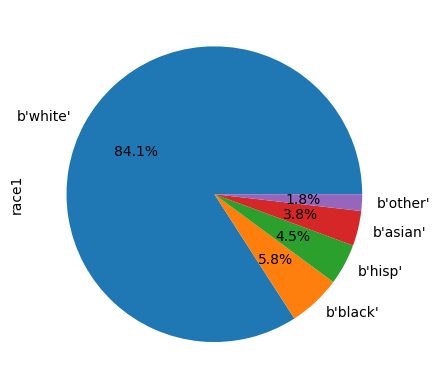

In [19]:
print(df['race1'].value_counts())
df['race1'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = b'white'

1.0    16931
0.0      560
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

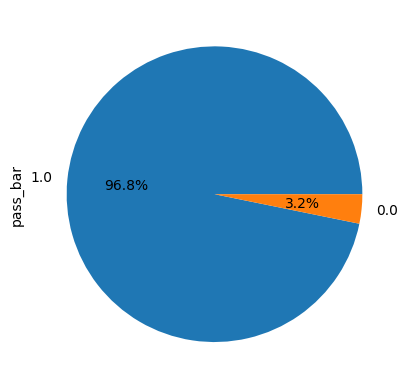

In [20]:
print(df.loc[df['race1']=="b'white'"]['pass_bar'].value_counts())
df.loc[df['race1']=="b'white'"]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = b'black'

1.0    935
0.0    266
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

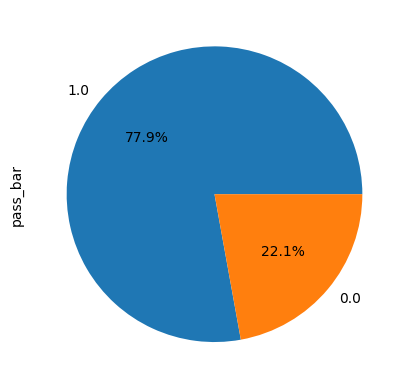

In [21]:
print(df.loc[df['race1']=="b'black'"]['pass_bar'].value_counts())
df.loc[df['race1']=="b'black'"]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = b'hisp'

1.0    817
0.0    116
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

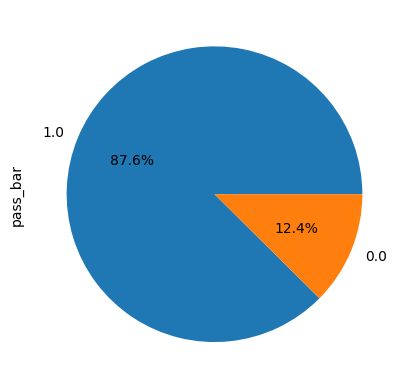

In [22]:
print(df.loc[df['race1']=="b'hisp'"]['pass_bar'].value_counts())
df.loc[df['race1']=="b'hisp'"]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = b'asian'

1.0    735
0.0     60
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

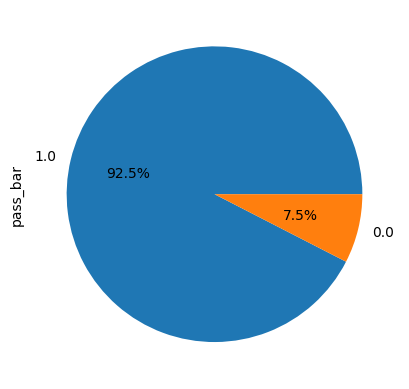

In [23]:
print(df.loc[df['race1']=="b'asian'"]['pass_bar'].value_counts())
df.loc[df['race1']=="b'asian'"]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = b'other'

1.0    340
0.0     38
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

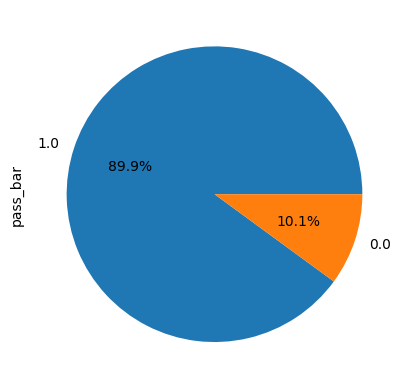

In [24]:
print(df.loc[df['race1']=="b'other'"]['pass_bar'].value_counts())
df.loc[df['race1']=="b'other'"]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1.0

let y- = 0.0

let s0 = b'white'

let s1 = not b'white'

In [25]:
# p(y+|s0) -> p(1.0|b'white')
p1 = len(df.loc[(df['race1']=="b'white'") & (df['pass_bar']>0.5)]) / len(df.loc[df['race1']=="b'white'"])
#print(p1)
# p(y-|s1) -> p(0.0|!b'white')
p2 = len(df.loc[(df['race1']!="b'white'") & (df['pass_bar']<0.5)]) / len(df.loc[df['race1']!="b'white'"])
#print(p2)
# p(y+|s1) -> p(1.0|!b'white')
p3 = len(df.loc[(df['race1']!="b'white'") & (df['pass_bar']>0.5)]) / len(df.loc[df['race1']!="b'white'"])
#print(p3)
# p(y-|s0) -> p(0.0|b'white')
p4 = len(df.loc[(df['race1']=="b'white'") & (df['pass_bar']<0.5)]) / len(df.loc[df['race1']=="b'white'"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 5.133


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1.0

let y- = 0.0

let s0 = b'white'

let s1 = not b'white'

In [26]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.132


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1.0

let y- = 0.0

let s0 = b'black'

let s1 = not b'black'

In [27]:
# p(y+|s0) -> p(1.0|b'black')
p1 = len(df.loc[(df['race1']=="b'black'") & (df['pass_bar']>0.5)]) / len(df.loc[df['race1']=="b'black'"])
#print(p1)
# p(y-|s1) -> p(0.0|!b'black')
p2 = len(df.loc[(df['race1']!="b'black'") & (df['pass_bar']<0.5)]) / len(df.loc[df['race1']!="b'black'"])
#print(p2)
# p(y+|s1) -> p(1.0|!b'black')
p3 = len(df.loc[(df['race1']!="b'black'") & (df['pass_bar']>0.5)]) / len(df.loc[df['race1']!="b'black'"])
#print(p3)
# p(y-|s0) -> p(0.0|b'black')
p4 = len(df.loc[(df['race1']=="b'black'") & (df['pass_bar']<0.5)]) / len(df.loc[df['race1']=="b'black'"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.145


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1.0

let y- = 0.0

let s0 = b'black'

let s1 = not b'black'

In [28]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.811


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1.0

let y- = 0.0

let s0 = b'hisp'

let s1 = not b'hisp'

In [29]:
# p(y+|s0) -> p(1.0|b'hisp')
p1 = len(df.loc[(df['race1']=="b'hisp'") & (df['pass_bar']>0.5)]) / len(df.loc[df['race1']=="b'hisp'"])
#print(p1)
# p(y-|s1) -> p(0.0|!b'hisp')
p2 = len(df.loc[(df['race1']!="b'hisp'") & (df['pass_bar']<0.5)]) / len(df.loc[df['race1']!="b'hisp'"])
#print(p2)
# p(y+|s1) -> p(1.0|!b'hisp')
p3 = len(df.loc[(df['race1']!="b'hisp'") & (df['pass_bar']>0.5)]) / len(df.loc[df['race1']!="b'hisp'"])
#print(p3)
# p(y-|s0) -> p(0.0|b'hisp')
p4 = len(df.loc[(df['race1']=="b'hisp'") & (df['pass_bar']<0.5)]) / len(df.loc[df['race1']=="b'hisp'"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.344


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1.0

let y- = 0.0

let s0 = b'hisp'

let s1 = not b'hisp'

In [30]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.918


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1.0

let y- = 0.0

let s0 = b'asian'

let s1 = not b'asian'

In [31]:
# p(y+|s0) -> p(1.0|b'asian')
p1 = len(df.loc[(df['race1']=="b'asian'") & (df['pass_bar']>0.5)]) / len(df.loc[df['race1']=="b'asian'"])
#print(p1)
# p(y-|s1) -> p(0.0|!b'asian')
p2 = len(df.loc[(df['race1']!="b'asian'") & (df['pass_bar']<0.5)]) / len(df.loc[df['race1']!="b'asian'"])
#print(p2)
# p(y+|s1) -> p(1.0|!b'asian')
p3 = len(df.loc[(df['race1']!="b'asian'") & (df['pass_bar']>0.5)]) / len(df.loc[df['race1']!="b'asian'"])
#print(p3)
# p(y-|s0) -> p(0.0|b'asian')
p4 = len(df.loc[(df['race1']=="b'asian'") & (df['pass_bar']<0.5)]) / len(df.loc[df['race1']=="b'asian'"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.631


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1.0

let y- = 0.0

let s0 = b'asian'

let s1 = not b'asian'

In [32]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.972


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1.0

let y- = 0.0

let s0 = b'other'

let s1 = not b'other'

In [33]:
# p(y+|s0) -> p(1.0|b'other')
p1 = len(df.loc[(df['race1']=="b'other'") & (df['pass_bar']>0.5)]) / len(df.loc[df['race1']=="b'other'"])
#print(p1)
# p(y-|s1) -> p(0.0|!b'other')
p2 = len(df.loc[(df['race1']!="b'other'") & (df['pass_bar']<0.5)]) / len(df.loc[df['race1']!="b'other'"])
#print(p2)
# p(y+|s1) -> p(1.0|!b'other')
p3 = len(df.loc[(df['race1']!="b'other'") & (df['pass_bar']>0.5)]) / len(df.loc[df['race1']!="b'other'"])
#print(p3)
# p(y-|s0) -> p(0.0|b'other')
p4 = len(df.loc[(df['race1']=="b'other'") & (df['pass_bar']<0.5)]) / len(df.loc[df['race1']=="b'other'"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.462


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1.0

let y- = 0.0

let s0 = b'other'

let s1 = not b'other'

In [34]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.946


### Proxies

Most of the proxies found for race include (a combination of):
 - native-country
 - relationship
 - education
 - occupation


Best model (min depth) found with a node at depth 2 with 12 samples.

	** decile1b_b'02' > 0.5 , decile3_b'07' > 0.5 ,  #impurity: 0.0, #samples: 12.

Best model (max sample) found with 285 sample in a node at depth 9.

    ** zfygpa > -0.8349999785423279 , ugpa > 2.75 , decile1b_b'10' > 0.5 , zfygpa > 1.8049999475479126 , fam_inc > 1.5 , fam_inc > 3.5 , age <= -40.5 , tier <= 5.5 , zgpa <= 2.475000023841858 ,  #impurity: 0.0, #samples: 285.

Other:

    ** zfygpa > -0.8349999785423279 , ugpa > 2.75 , decile1b_b'10' > 0.5 , zfygpa > 1.8049999475479126 , fam_inc > 1.5 , fam_inc <= 3.5 , zfygpa <= 2.215000033378601 , lsat > 35.25 ,  #impurity: 0.0, #samples: 165.



For proxy: decile1b == b'02' & decile3 == b'07'

b'white'    12
Name: race1, dtype: int64


<AxesSubplot:ylabel='race1'>

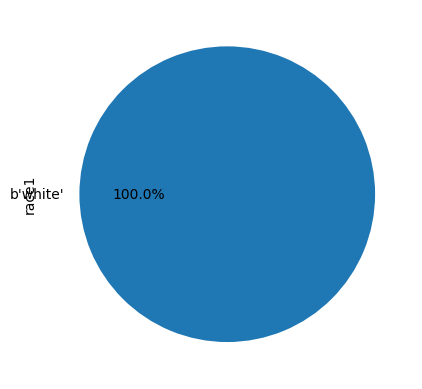

In [35]:
print(df.loc[(df['decile1b']=="b'02'") & (df['decile3']=="b'07'")]['race1'].value_counts())
df.loc[(df['decile1b']=="b'02'") & (df['decile3']=="b'07'")]['race1'].value_counts().plot(kind='pie',autopct='%1.1f%%')

1.0    12
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

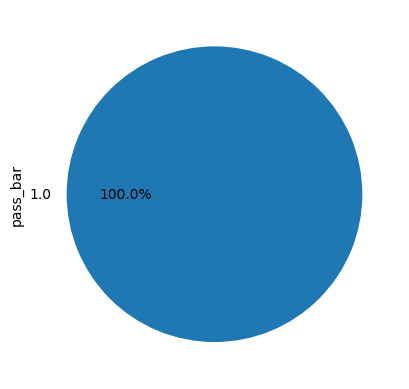

In [36]:
print(df.loc[(df['decile1b']=="b'02'") & (df['decile3']=="b'07'")]['pass_bar'].value_counts())
df.loc[(df['decile1b']=="b'02'") & (df['decile3']=="b'07'")]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1.0

let y- = 0.0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [37]:
# p(y+|s0) -> p(1.0|Proxy)
p1 = len(df.loc[(df['decile1b']=="b'02'") & (df['decile3']=="b'07'") & (df['pass_bar']>0.5)]) / len(df.loc[(df['decile1b']=="b'02'") & (df['decile3']=="b'07'")])
#print(p1)
# p(y-|s1) -> p(0.0|!Proxy)
p2 = len(df.loc[((df['decile1b']!="b'02'") | (df['decile3']!="b'07'")) & (df['pass_bar']<0.5)]) / len(df.loc[((df['decile1b']!="b'02'") | (df['decile3']!="b'07'"))])
#print(p2)
# p(y+|s1) -> p(1.0|!Proxy)
p3 = len(df.loc[((df['decile1b']!="b'02'") | (df['decile3']!="b'07'")) & (df['pass_bar']>0.5)]) / len(df.loc[((df['decile1b']!="b'02'") | (df['decile3']!="b'07'"))])
#print(p3)
# p(y-|s0) -> p(0.0|Proxy)
p4 = len(df.loc[(df['decile1b']=="b'02'") & (df['decile3']=="b'07'") & (df['pass_bar']<0.5)]) / len(df.loc[(df['decile1b']=="b'02'") & (df['decile3']=="b'07'")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

ZeroDivisionError: float division by zero

### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1.0

let y- = 0.0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [38]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.053


For proxy: ugpa > 2.75 & decile1b == b'10' & zfygpa > 1.8049999475479126 & fam_inc > 3.5 & age <= -40.5 & tier <= 5.5 & zgpa <= 2.475000023841858

b'white'    285
Name: race1, dtype: int64


<AxesSubplot:ylabel='race1'>

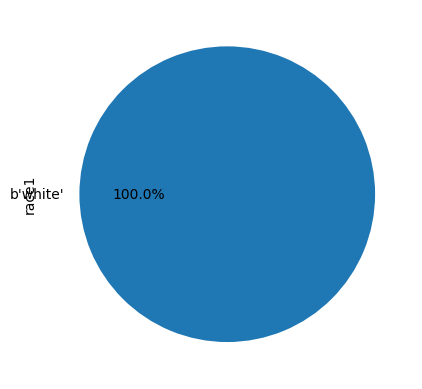

In [39]:
print(df.loc[(df['zfygpa']>1.8049999475479126) & (df['ugpa']>2.75) & (df['decile1b']=="b'10'") & (df['fam_inc']>3.5) & (df['age']<=-40.5) & (df['tier']<=5.5) & (df['zgpa']<=2.475000023841858)]['race1'].value_counts())
df.loc[(df['zfygpa']>1.8049999475479126) & (df['ugpa']>2.75) & (df['decile1b']=="b'10'") & (df['fam_inc']>3.5) & (df['age']<=-40.5) & (df['tier']<=5.5) & (df['zgpa']<=2.475000023841858)]['race1'].value_counts().plot(kind='pie',autopct='%1.1f%%')

1.0    284
0.0      1
Name: pass_bar, dtype: int64


<AxesSubplot:ylabel='pass_bar'>

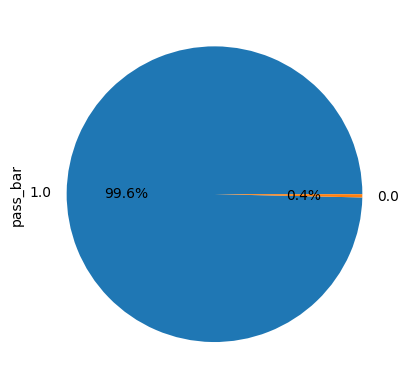

In [40]:
print(df.loc[(df['zfygpa']>1.8049999475479126) & (df['ugpa']>2.75) & (df['decile1b']=="b'10'") & (df['fam_inc']>3.5) & (df['age']<=-40.5) & (df['tier']<=5.5) & (df['zgpa']<=2.475000023841858)]['pass_bar'].value_counts())
df.loc[(df['zfygpa']>1.8049999475479126) & (df['ugpa']>2.75) & (df['decile1b']=="b'10'") & (df['fam_inc']>3.5) & (df['age']<=-40.5) & (df['tier']<=5.5) & (df['zgpa']<=2.475000023841858)]['pass_bar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 1.0

let y- = 0.0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [41]:
# (df['zfygpa']>1.8049999475479126) & (df['ugpa']>2.75) & (df['decile1b']=="b'10'") & (df['fam_inc']>3.5) & (df['age']<=-40.5) & (df['tier']<=5.5) & (df['zgpa']<=2.475000023841858)
# p(y+|s0) -> p(1.0|Proxy)
p1 = len(df.loc[(df['zfygpa']>1.8049999475479126) & (df['ugpa']>2.75) & (df['decile1b']=="b'10'") & (df['fam_inc']>3.5) & (df['age']<=-40.5) & (df['tier']<=5.5) & (df['zgpa']<=2.475000023841858) & (df['pass_bar']>0.5)]) / len(df.loc[(df['zfygpa']>1.8049999475479126) & (df['ugpa']>2.75) & (df['decile1b']=="b'10'") & (df['fam_inc']>3.5) & (df['age']<=-40.5) & (df['tier']<=5.5) & (df['zgpa']<=2.475000023841858)])
#print(p1)
# p(y-|s1) -> p(0.0|!Proxy)
p2 = len(df.loc[((df['zfygpa']<=1.8049999475479126) | (df['ugpa']<=2.75) | (df['decile1b']!="b'10'") | (df['fam_inc']<=3.5) | (df['age']>-40.5) | (df['tier']>5.5) | (df['zgpa']>2.475000023841858)) & (df['pass_bar']<0.5)]) / len(df.loc[((df['zfygpa']<=1.8049999475479126) | (df['ugpa']<=2.75) | (df['decile1b']!="b'10'") | (df['fam_inc']<=3.5) | (df['age']>-40.5) | (df['tier']>5.5) | (df['zgpa']>2.475000023841858))])
#print(p2)
# p(y+|s1) -> p(1.0|!Proxy)
p3 = len(df.loc[((df['zfygpa']<=1.8049999475479126) | (df['ugpa']<=2.75) | (df['decile1b']!="b'10'") | (df['fam_inc']<=3.5) | (df['age']>-40.5) | (df['tier']>5.5) | (df['zgpa']>2.475000023841858)) & (df['pass_bar']>0.5)]) / len(df.loc[((df['zfygpa']<=1.8049999475479126) | (df['ugpa']<=2.75) | (df['decile1b']!="b'10'") | (df['fam_inc']<=3.5) | (df['age']>-40.5) | (df['tier']>5.5) | (df['zgpa']>2.475000023841858))])
#print(p3)
# p(y-|s0) -> p(0.0|Proxy)
p4 = len(df.loc[(df['zfygpa']>1.8049999475479126) & (df['ugpa']>2.75) & (df['decile1b']=="b'10'") & (df['fam_inc']>3.5) & (df['age']<=-40.5) & (df['tier']<=5.5) & (df['zgpa']<=2.475000023841858) & (df['pass_bar']<0.5)]) / len(df.loc[(df['zfygpa']>1.8049999475479126) & (df['ugpa']>2.75) & (df['decile1b']=="b'10'") & (df['fam_inc']>3.5) & (df['age']<=-40.5) & (df['tier']<=5.5) & (df['zgpa']<=2.475000023841858)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 15.152


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 1.0

let y- = 0.0

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [42]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.050
